# Problem Statement

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and we have been asked to classify positive, negative, and neutral tweets.

Dataset has following features/variables

tweet_id airline_sentiment airline_sentiment_confidence negativereason negativereason_confidence airline airline_sentiment_gold name negativereason_gold retweet_count text tweet_coord tweet_created tweet_location user_timezone

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
#Load the dataset
Airline_tweets = pd.read_csv('twitter-airline-sentiment.csv')

In [3]:
Airline_tweets.shape

(14640, 15)

In [4]:
Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
# lets look at the 'airline' column
print(Airline_tweets['airline'].unique(),'\n')
print(Airline_tweets['airline'].value_counts())

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American'] 

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


In [7]:
# check for the null values
Airline_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

check for the null values present in the form of percentage

In [8]:
(Airline_tweets.isnull().sum()*100 / Airline_tweets.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

#### We will delete the columns having missing value percentage more than 90%

In [9]:
Airline_tweets.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],inplace=True,axis=1)


In [10]:
print('The number of columns after droping :',Airline_tweets.shape[1])

The number of columns after droping : 12


In [11]:
ct = pd.crosstab(Airline_tweets['airline'],Airline_tweets['airline_sentiment'])
ct

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [12]:
ct_norm = round(pd.crosstab(Airline_tweets['airline'],Airline_tweets['airline_sentiment'], normalize = 'index')*100,2)
ct_norm

airline_sentiment,negative,neutral,positive
airline,,,
American,71.04,16.78,12.18
Delta,42.98,32.54,24.48
Southwest,49.01,27.44,23.55
US Airways,77.69,13.08,9.23
United,68.89,18.24,12.87
Virgin America,35.91,33.93,30.16


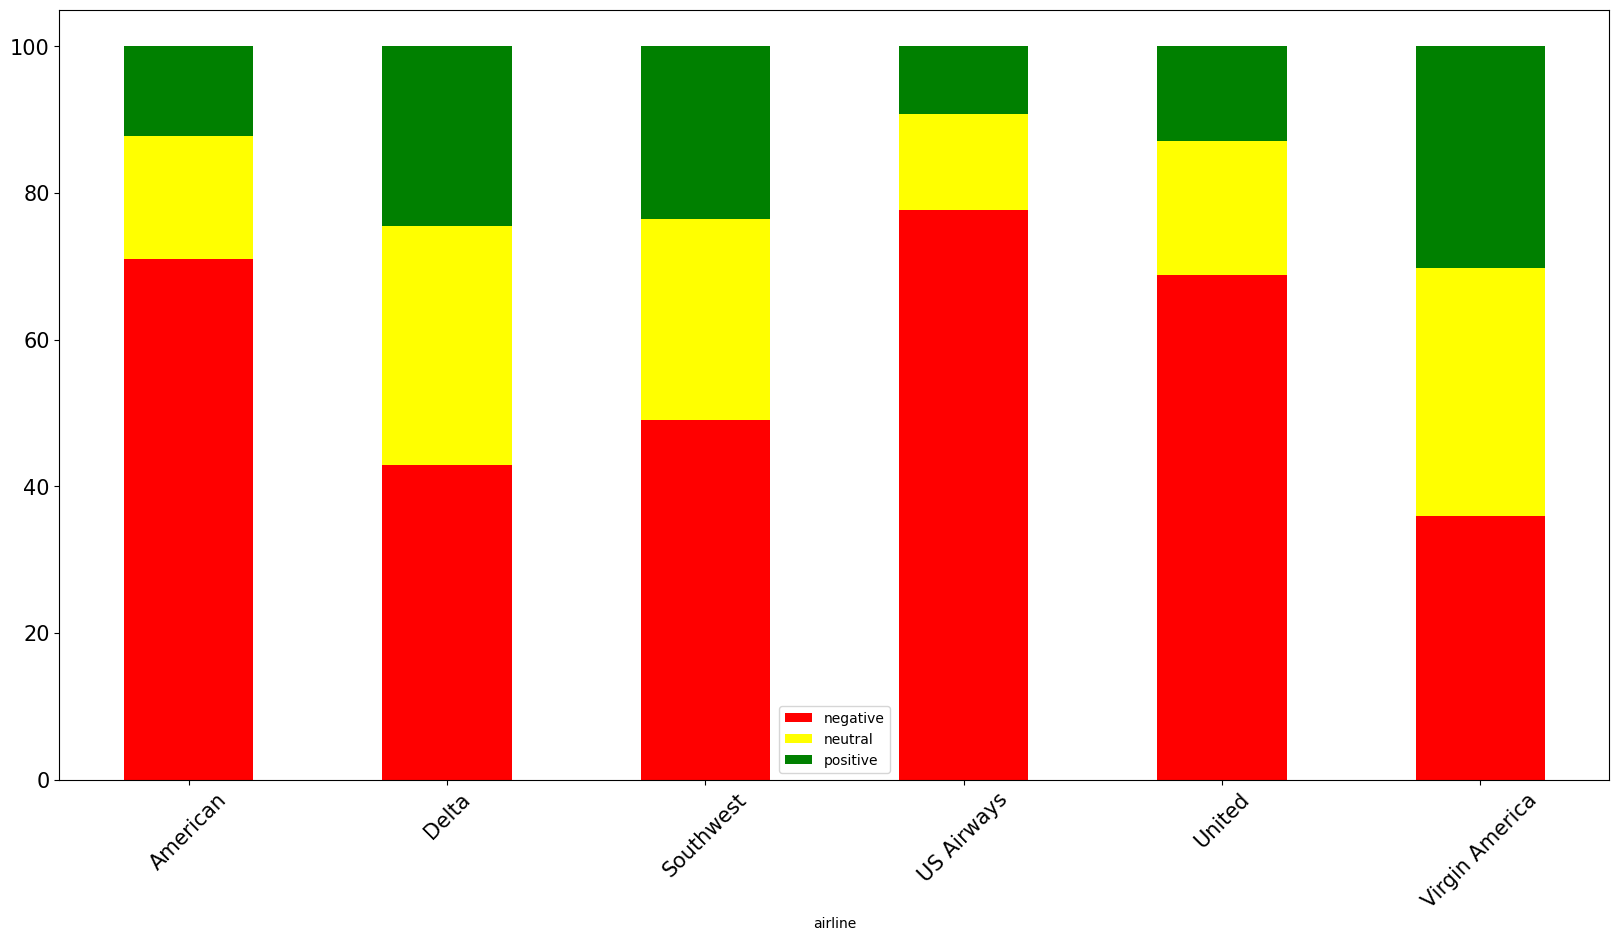

In [13]:
# note = below plot is graphed by using pandas
plt.rcParams['figure.figsize']=(20,10)
ct_norm.plot.bar(stacked=True,color={'negative':'red','neutral':'yellow','positive':'green'})
plt.legend(loc='best')
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15);

### 1. US Airways have a least postive sentiment followed by American and United


### 2. Virgin American has most balanced sentiments# 

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
new_df = Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
len(words.split())

180680

In [16]:
from wordcloud import WordCloud

In [17]:
# for 'negative' Airline Sentiment
new_df = Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_words = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

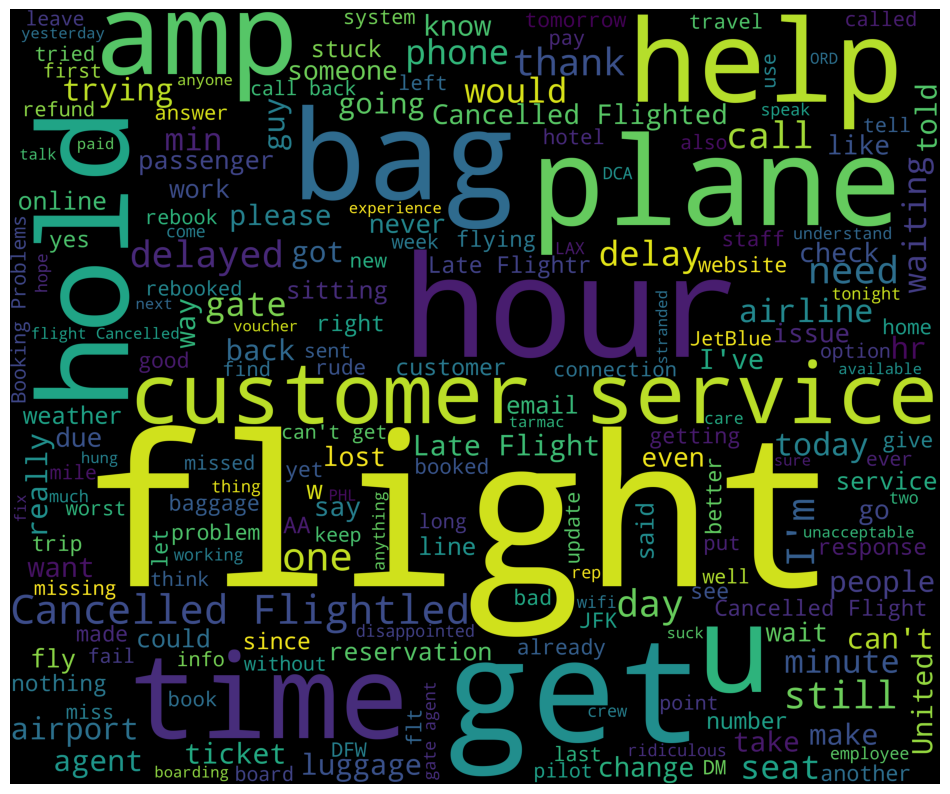

In [18]:
wordcloud = WordCloud(stopwords=stop,background_color='black',width = 3000,height = 2500).generate(cleaned_words)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

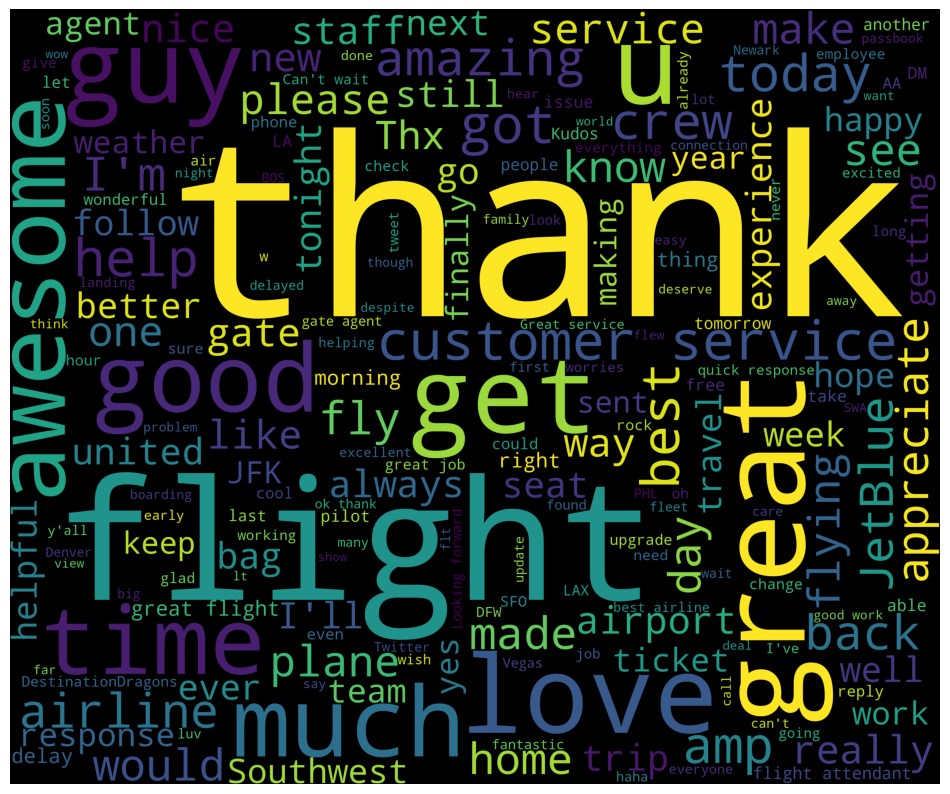

In [19]:
# for 'positive' Airline Sentiment

new_df = Airline_tweets[Airline_tweets['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_words = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])


wordcloud = WordCloud(stopwords=stop,background_color='black',width = 3000,height = 2500).generate(cleaned_words)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

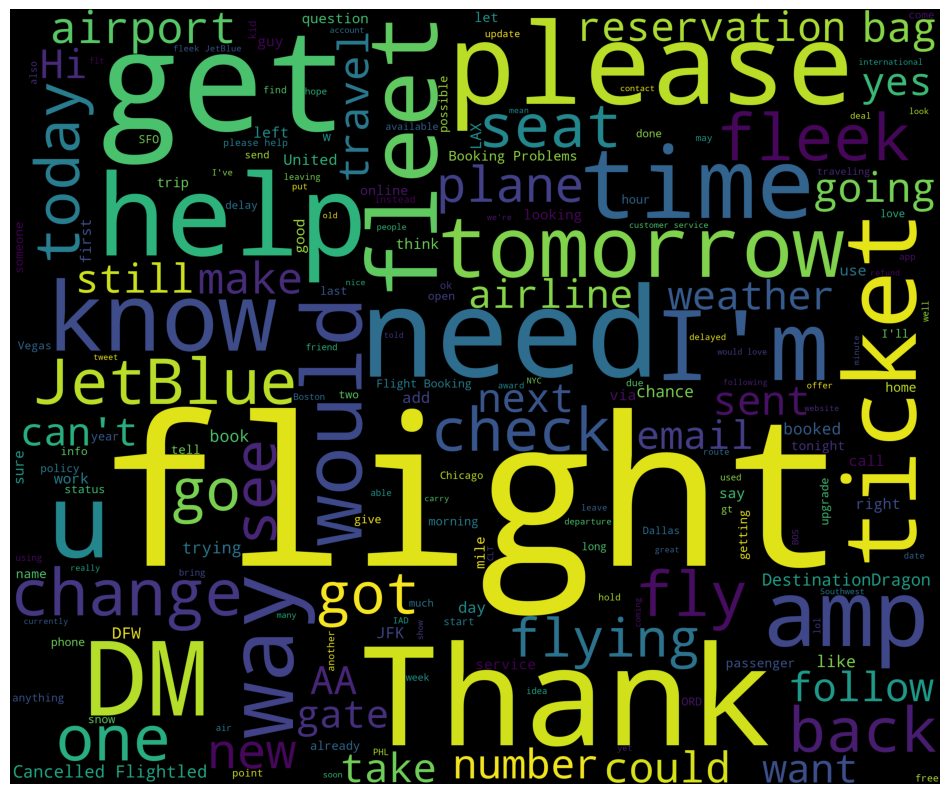

In [20]:
# for 'neutral' Airline Sentiment
new_df = Airline_tweets[Airline_tweets['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_words = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])


wordcloud = WordCloud(stopwords=stop,background_color='black',width = 3000,height = 2500).generate(cleaned_words)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

1. In the above wordcloud there are certain words probably will not make too much sense to study the reason for negative sentiment 
and subsubsequently based on the frequency of these words we will decide if the same needs to be deleted

2. Lets understand the negativity for each airline

## Basic Preprocessing

### Lower Case Conversion

In [21]:
Airline_tweets['Tweet']=Airline_tweets['text'].str.lower()
Airline_tweets['Tweet'].head(10)

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
5    @virginamerica seriously would pay $30 a fligh...
6    @virginamerica yes, nearly every time i fly vx...
7    @virginamerica really missed a prime opportuni...
8      @virginamerica well, i didn't…but now i do! :-d
9    @virginamerica it was amazing, and arrived an ...
Name: Tweet, dtype: object

### Removal of Stopwords

In [22]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: ' '.join (word for word in x.split() if word not in stop))
Airline_tweets['Tweet'].head(10)

0                       @virginamerica @dhepburn said.
1    @virginamerica plus added commercials experien...
2    @virginamerica today... must mean need take an...
3    @virginamerica really aggressive blast obnoxio...
4                  @virginamerica really big bad thing
5    @virginamerica seriously would pay $30 flight ...
6    @virginamerica yes, nearly every time fly vx “...
7    @virginamerica really missed prime opportunity...
8              @virginamerica well, didn't…but do! :-d
9    @virginamerica amazing, arrived hour early. go...
Name: Tweet, dtype: object

### Removal Punctuations

In [23]:
Airline_tweets['Tweet']=Airline_tweets['Tweet'].str.replace('[^a-z\s]','')
# Replace any character that is not lower case alphabate or space character with nothing.
Airline_tweets['Tweet'].head() #[^a-z\s]

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

In [24]:
Airline_tweets['Tweet']=Airline_tweets['Tweet'].apply(lambda x: " ".join(word for word in x.split() if 'http' not in word))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

### Common word removal

In [25]:
# 1) We will create a list of highly frequetly words and then we decide if we remove it or retain it.
# 2) Reason is that this file has tweets related to flights. So no point in keeping the words like name, unless we have
# tweets related to different category
# 3) Name of the specific airline is not removed as we would require the name of the airline for bigram analysis

In [26]:
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[:30]
freq

united           4144
flight           3895
usairways        3051
americanair      2957
southwestair     2453
jetblue          2361
get              1336
thanks           1072
cancelled        1056
service           956
help              855
time              770
im                764
customer          746
us                706
hours             678
flights           646
amp               641
hold              638
plane             620
thank             602
cant              579
still             569
please            560
one               558
need              553
would             548
delayed           529
virginamerica     521
back              518
dtype: int64

Please note that we are removing digit 2 here. This 2 might mean 'to' in English. However as advanced library package of NLP are not used, this wouldgety treated as a digit and hence we are removing the same.

In [27]:
freq = ['flight','2','aa']
Airline_tweets['Tweet']=Airline_tweets['Tweet'].apply(lambda x: ' '.join(word for word in x.split() if word not in freq))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

Rare Words Removal > This is done as association of these less occuring words with the existing words could be noise

As it is difficult to make out if these words will have association in textg analytics or not, hence to start with these words are kept in the dataset

In [28]:
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[-30:]
freq

essentials           1
hotlanta             1
rnd                  1
promofly             1
irate                1
quietly              1
dynamite             1
unapologetic         1
uninformed           1
zippers              1
busted               1
seam                 1
neveryamind          1
coldly               1
chalk                1
sweepstakesit        1
defective            1
stowaway             1
firstboth            1
flightingdelaying    1
dani                 1
danihampton          1
phxgtdal             1
planefirstclass      1
peanutsonaplatter    1
rumor                1
letitgo              1
scroll               1
galaxy               1
blackberry           1
dtype: int64

### Stemming

Stemming refers to the removal of suffixes like 'ing','ly','s',etc by a simple rule based approach

In [29]:
from nltk.stem import PorterStemmer 


In [30]:
st=PorterStemmer()
Airline_tweets['Tweet_stem'] = Airline_tweets['Tweet'].apply(lambda x: ' '.join(st.stem(word) for word in x.split()))
Airline_tweets['Tweet_stem'].head()

0                          virginamerica dhepburn said
1           virginamerica plu ad commerci experi tacki
2    virginamerica today must mean need take anoth ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: Tweet_stem, dtype: object

In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to C:\Users\ANAY
[nltk_data]     TIWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
lmtzr = WordNetLemmatizer()


In [33]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: ' '.join(lmtzr.lemmatize(x) for x in x.split()))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercial experience...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

In [34]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  Tweet                         14640 non-null  object 
 13  T

In [35]:
processed_features = Airline_tweets.iloc[:,12].values
labels = Airline_tweets.iloc[:,1].values

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(max_df=1000,min_df=100,max_features=2500) #(min_df = 0.1 , max_df = 0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [38]:
print(vectorizer,'\n')
print(processed_features)

TfidfVectorizer(max_df=1000, max_features=2500, min_df=100) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
feature_names = vectorizer.get_feature_names_out()
pd.DataFrame(processed_features,columns=feature_names)

,able,again,agent,ago,air,airline,airport,already,also,always,...,without,work,working,worst,would,year,yes,yesterday,yet,you
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.706803,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(processed_features,labels,test_size=0.2,random_state=0)

In [42]:
y_train

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [43]:
X_train.shape

(11712, 238)

# Decision Tree Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
# Performance Matrix on train data set
from sklearn import metrics
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train,y_train)
print(model_score,'\n')
print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict),'\n')

0.9280225409836066 

[[7005  284   19]
 [ 161 2287   37]
 [  90  252 1577]] 

              precision    recall  f1-score   support

    negative       0.97      0.96      0.96      7308
     neutral       0.81      0.92      0.86      2485
    positive       0.97      0.82      0.89      1919

    accuracy                           0.93     11712
   macro avg       0.91      0.90      0.90     11712
weighted avg       0.93      0.93      0.93     11712
 



In [46]:
# Performance Matrix on train data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test,y_test)
print(model_score,'\n')
print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict),'\n')

0.6530054644808743 

[[1429  305  136]
 [ 259  296   59]
 [ 158   99  187]] 

              precision    recall  f1-score   support

    negative       0.77      0.76      0.77      1870
     neutral       0.42      0.48      0.45       614
    positive       0.49      0.42      0.45       444

    accuracy                           0.65      2928
   macro avg       0.56      0.56      0.56      2928
weighted avg       0.66      0.65      0.65      2928
 



# Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
# Perform Matrix on the train data set
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train,y_train)
print(model_score,'\n')
print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict),'\n')

0.9280225409836066 

[[6959  323   26]
 [ 121 2315   49]
 [  74  250 1595]] 

              precision    recall  f1-score   support

    negative       0.97      0.95      0.96      7308
     neutral       0.80      0.93      0.86      2485
    positive       0.96      0.83      0.89      1919

    accuracy                           0.93     11712
   macro avg       0.91      0.90      0.90     11712
weighted avg       0.93      0.93      0.93     11712
 



In [49]:
# Perform Matrix on the test data set
from sklearn import metrics
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test,y_test)
print(model_score,'\n')
print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict),'\n')

0.717896174863388 

[[1624  180   66]
 [ 279  291   44]
 [ 173   84  187]] 

              precision    recall  f1-score   support

    negative       0.78      0.87      0.82      1870
     neutral       0.52      0.47      0.50       614
    positive       0.63      0.42      0.50       444

    accuracy                           0.72      2928
   macro avg       0.65      0.59      0.61      2928
weighted avg       0.71      0.72      0.71      2928
 



# Discriminant Analysis

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [54]:
# Performance Matrix on training data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train,y_train)
print(model_score,'\n')
print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict),'\n')

0.7336065573770492 

[[6474  609  225]
 [1103 1216  166]
 [ 642  375  902]] 

              precision    recall  f1-score   support

    negative       0.79      0.89      0.83      7308
     neutral       0.55      0.49      0.52      2485
    positive       0.70      0.47      0.56      1919

    accuracy                           0.73     11712
   macro avg       0.68      0.62      0.64     11712
weighted avg       0.72      0.73      0.72     11712
 



In [55]:
# Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test,y_test)
print(model_score,'\n')
print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict),'\n')

0.7240437158469946 

[[1646  165   59]
 [ 300  271   43]
 [ 162   79  203]] 

              precision    recall  f1-score   support

    negative       0.78      0.88      0.83      1870
     neutral       0.53      0.44      0.48       614
    positive       0.67      0.46      0.54       444

    accuracy                           0.72      2928
   macro avg       0.66      0.59      0.62      2928
weighted avg       0.71      0.72      0.71      2928
 



### Out of the 3 models given above, considering difference between train and test data set performance parameters, LDA has performed the best

## Lets create model with only 2 classes where positive and neutral tweets are merged and treated as non-negative

In [102]:
def Tweet(x):
    if x == 'positive':
        return 'Non-Negative'
    elif x == 'neutral':
        return 'Non-Negative'
    else:
        return 'Negative'
    

In [103]:
# we will create a new column called M-Sentiment (Modified Sentiment)
Airline_tweets['M-Sentiment'] = Airline_tweets['airline_sentiment'].apply(Tweet)
Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,Tweet,Tweet_stem,M-Sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,virginamerica dhepburn said,Non-Negative
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus added commercial experience...,virginamerica plu ad commerci experi tacki,Non-Negative
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...,virginamerica today must mean need take anoth ...,Non-Negative
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,virginamerica realli aggress blast obnoxi ente...,Negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,virginamerica realli big bad thing,Negative


In [104]:
# Lets check the levels of newly created column or fields
Airline_tweets['M-Sentiment'].value_counts()

Negative        9178
Non-Negative    5462
Name: M-Sentiment, dtype: int64

In [105]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  Tweet                         14640 non-null  object 
 13  T

In [106]:
processed_features = Airline_tweets.iloc[:,12].values
labels = Airline_tweets.iloc[:,14].values

In [107]:
processed_features

array(['virginamerica dhepburn said',
       'virginamerica plus added commercial experience tacky',
       'virginamerica today must mean need take another trip', ...,
       'americanair please bring american airline blackberry',
       'americanair money change answer phone suggestion make commitment',
       'americanair ppl need know many seat next plz put u standby people next'],
      dtype=object)

In [108]:
labels

array(['Non-Negative', 'Non-Negative', 'Non-Negative', ...,
       'Non-Negative', 'Negative', 'Non-Negative'], dtype=object)

In [109]:
vectorizer = TfidfVectorizer(max_df=1000,min_df=100,max_features=2500)
processed_features=vectorizer.fit_transform(processed_features).toarray()

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(processed_features,labels,test_size=0.2,random_state=0)

# Decision Tree with Binary Classification

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {
    'max_depth':[9], #[3,5,7,9]
    'min_samples_leaf':[50], #[50,100,150]
    'min_samples_split':[450] #[150,300,450]
}

In [113]:
dtcl = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtcl,param_grid=param_grid,cv=3)

In [114]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [9], 'min_samples_leaf': [50],
                         'min_samples_split': [450]})

In [115]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 450}

In [116]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=9, min_samples_leaf=50, min_samples_split=450)

In [117]:
# Performance matrix on training dat set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train,y_train)
print(model_score,'\n')
print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict),'\n')

0.6821209016393442 

[[7143  165]
 [3558  846]] 

              precision    recall  f1-score   support

    Negative       0.67      0.98      0.79      7308
Non-Negative       0.84      0.19      0.31      4404

    accuracy                           0.68     11712
   macro avg       0.75      0.58      0.55     11712
weighted avg       0.73      0.68      0.61     11712
 



In [118]:
# Performance matrix on test dat set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test,y_test)
print(model_score,'\n')
print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict),'\n')

0.6871584699453552 

[[1817   53]
 [ 863  195]] 

              precision    recall  f1-score   support

    Negative       0.68      0.97      0.80      1870
Non-Negative       0.79      0.18      0.30      1058

    accuracy                           0.69      2928
   macro avg       0.73      0.58      0.55      2928
weighted avg       0.72      0.69      0.62      2928
 



# Random Forest Model as Binary Classifer

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[9],#[3,5,7,9]
    'min_samples_leaf':[50],#[50,100,150] 1-4%
    'min_samples_split':[300],#[150,300,450] 3-12%
    'n_estimators':[25]#[25,50,100]
}

In [120]:
rfcl = RandomForestClassifier()
grid_search = GridSearchCV(param_grid=param_grid,estimator=rfcl,cv=3)

In [121]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9], 'min_samples_leaf': [50],
                         'min_samples_split': [300], 'n_estimators': [25]})

In [122]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 50,
 'min_samples_split': 300,
 'n_estimators': 25}

In [123]:
best_grid = grid_search.best_estimator_

In [124]:
# Performance matrix on training dat set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train,y_train)
print(model_score,'\n')
print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict),'\n')

0.6801571038251366 

[[7168  140]
 [3606  798]] 

              precision    recall  f1-score   support

    Negative       0.67      0.98      0.79      7308
Non-Negative       0.85      0.18      0.30      4404

    accuracy                           0.68     11712
   macro avg       0.76      0.58      0.55     11712
weighted avg       0.74      0.68      0.61     11712
 



In [125]:
# Performance matrix on test dat set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test,y_test)
print(model_score,'\n')
print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict),'\n')

0.6851092896174863 

[[1823   47]
 [ 875  183]] 

              precision    recall  f1-score   support

    Negative       0.68      0.97      0.80      1870
Non-Negative       0.80      0.17      0.28      1058

    accuracy                           0.69      2928
   macro avg       0.74      0.57      0.54      2928
weighted avg       0.72      0.69      0.61      2928
 



### Random Forest result were better than the output from decision tree on the test data set

# Discriminant Analysis with Binary Classifier

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [127]:
# Performance Matrix on training data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train,y_train)
print(model_score,'\n')
print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict),'\n')

0.7850068306010929 

[[6299 1009]
 [1509 2895]] 

              precision    recall  f1-score   support

    Negative       0.81      0.86      0.83      7308
Non-Negative       0.74      0.66      0.70      4404

    accuracy                           0.79     11712
   macro avg       0.77      0.76      0.77     11712
weighted avg       0.78      0.79      0.78     11712
 



In [128]:
# Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test,y_test)
print(model_score,'\n')
print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict),'\n')

0.7704918032786885 

[[1600  270]
 [ 402  656]] 

              precision    recall  f1-score   support

    Negative       0.80      0.86      0.83      1870
Non-Negative       0.71      0.62      0.66      1058

    accuracy                           0.77      2928
   macro avg       0.75      0.74      0.74      2928
weighted avg       0.77      0.77      0.77      2928
 



### 1) Linear Discriminant model has performed the best even without any hyperparameter tuning for both the classes

### 2) Test and Train performance is within the accepted limited of +/- 10%

# Conclusion

### Out of the 3 models given above, considering the difference between train and test dataset performance parameters, LDA has performed the best.(for both 3 classes and binary classification)